[[  37.47271347   36.61295319   35.18230438]
 [  94.41620636   66.52335358   65.24900055]
 [ 107.3690567    88.31797028   88.85131836]]


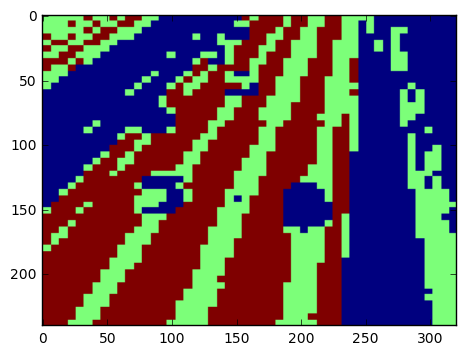

In [13]:
""" CLUSTERING """
import numpy as np
from PIL import Image, ImageDraw
from scipy.cluster.vq import *
from scipy.misc import imresize
import matplotlib.pyplot as plt
%matplotlib inline

steps = 50

im = np.array(Image.open('map.jpg'))
dx = im.shape[0] // steps
dy = im.shape[1] // steps

# CCompute color Features for each region

features = []

for x in range(steps):
    for y in range(steps):
        R = np.mean(im[x*dx:(x+1)*dx, y*dy:(y+1)*dy,0])
        G = np.mean(im[x*dx:(x+1)*dx, y*dy:(y+1)*dy,1])
        B = np.mean(im[x*dx:(x+1)*dx, y*dy:(y+1)*dy,2])
        features.append([R,G,B])
features = np.array(features,'f') # Make into array

# CLusters

centroids, variance = kmeans(features,3)
print(centroids)
code, distance = vq(features, centroids)
# create image with cluster labels
codeim = code.reshape(steps, steps)
codeim = imresize(codeim, im.shape[:2], interp='nearest')

plt.figure()
plt.imshow(codeim)
plt.show()

In [26]:
centroids.shape

(3, 3)

In [16]:
im.shape

(240, 320, 3)

In [15]:
features.shape

(2500, 3)

In [19]:
h, w = im.shape[:2]
y, x = np.mgrid[step/2:h:step, step/2:w:step].reshape(2,-1)
y = np.int32(y)
x = np.int32(x)

#fx, fy = flow[y,x].T
fx, fy = 0.4,0.1
lines = np.vstack([x, y, x+fx, y+fy]).T.reshape(-1, 2, 2)

In [20]:
lines.shape

(30, 2, 2)

In [24]:
lines[0]

array([[ 25. ,  25. ],
       [ 25.4,  25.1]])